# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-30 04:21:03--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-30 04:21:03--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [39]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [40]:
tweets.describe()

,Contents,Label
count,1914,1914
unique,1914,2
top,"vamos @arvenlol, dales duro como tú sabes #lo...",non-biased
freq,1,1596


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [41]:
def limpiar_texto(Contents):
    texto = Contents.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

tweets['texto_limpio'] = tweets['Contents'].apply(limpiar_texto)
tweets.head()

,Contents,Label,texto_limpio
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,"[chumeltorres, cabrón, tí, reciben, noticias, ..."
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,"[alguien, tan, amable, hacerme, compra, mañana..."
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"[jenniferduquee, hahaha, rico, nadamas, falta,..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,"[evagelcot, programa, favorito, sólo, encuentr..."
4,como siempre mi tortilla triunfa mas que otros...,non-biased,"[siempre, tortilla, triunfa, platos, playa, ht..."


In [50]:
words_to_remove = ["si", "ves", "ir", "mas", "ser", "así","q"]
stop_words.update(words_to_remove)

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [51]:
biased_tweets = tweets[tweets['Label'] == 'biased']['Contents']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['Contents']

In [52]:
biased_word_counts = Counter()
for tweet in biased_tweets:
    biased_word_counts.update(limpiar_texto(tweet))

non_biased_word_counts = Counter()
for tweet in non_biased_tweets:
    non_biased_word_counts.update(limpiar_texto(tweet))

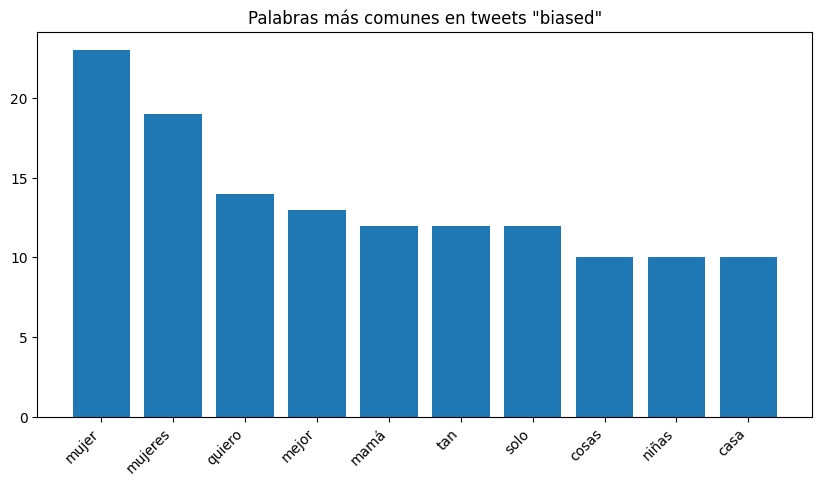

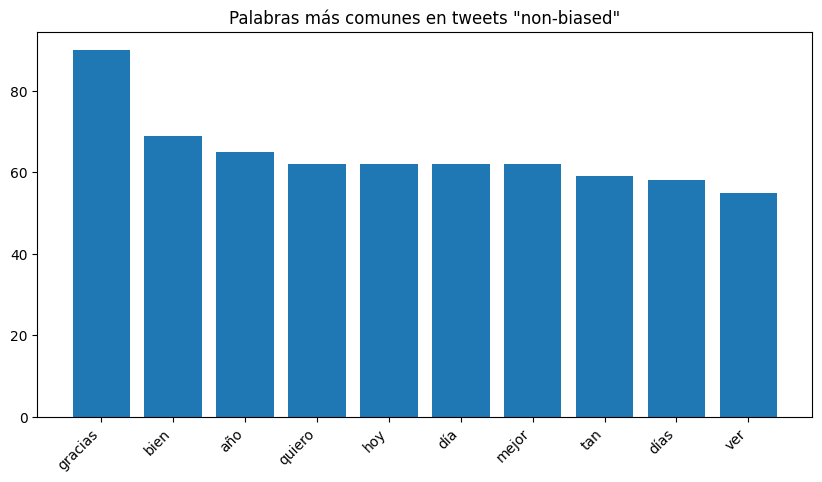

In [54]:
top_biased_words = biased_word_counts.most_common(10)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_biased_words))
plt.title('Palabras más comunes en tweets "biased"')
plt.xticks(rotation=45, ha='right')
plt.show()

top_non_biased_words = non_biased_word_counts.most_common(10)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_non_biased_words))
plt.title('Palabras más comunes en tweets "non-biased"')
plt.xticks(rotation=45, ha='right')
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

RTA: 1) En los tweets etiquetados como biased, las palabras más comunes son "mujer", "mujeres", "quiero" y "mamá", mientras que en los non-biased predominan términos como "gracias", "bien", "año", "hoy" y "día". Es interesante notar que la palabra "quiero" aparece en ambos tipos de tweets, lo que sugiere que no necesariamente está asociada a un sesgo específico.

2)Las palabras presentes en los tweets biased, como "mujer", "mujeres" y "mamá", pueden sugerir un enfoque emocional o personal, lo cual podría reflejar un sesgo relacionado con temas de género o experiencias individuales.

3)pueden usar esta información para identificar posibles sesgos en las opiniones expresadas por el público, especialmente en temas sensibles como el género, el rol de la mujer o experiencias familiares.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

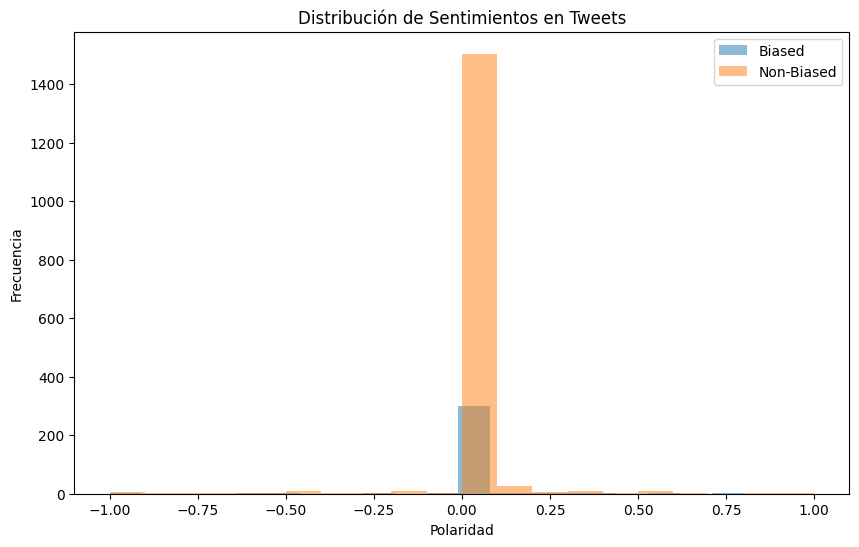

In [74]:
def obtener_polaridad(Contents):
    analysis = TextBlob(Contents)
    return analysis.sentiment.polarity

tweets['polaridad'] = tweets['Contents'].apply(obtener_polaridad)

plt.figure(figsize=(10, 6))
plt.hist(tweets[tweets['Label'] == 'biased']['polaridad'], bins=20, alpha=0.5, label='Biased')
plt.hist(tweets[tweets['Label'] == 'non-biased']['polaridad'], bins=20, alpha=0.5, label='Non-Biased')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentimientos en Tweets')
plt.legend(loc='upper right')
plt.show()

**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

1)Sí, existe una diferencia notable entre ambos tipos. En el caso de los tweets non-biased, se observa un nivel de sentimiento mucho mayor.

2)Esta naturaleza indica que los tweets biased no están tan cargados emocionalmente, lo que sugiere que no son tan sesgados en cuanto al sentimiento.

3) Clasificar los textos según su carga emocional (positiva, negativa o neutral). Esto permite identificar patrones, tendencias y opiniones predominantes, así como detectar cambios en el sentimiento a lo largo del tiempo.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

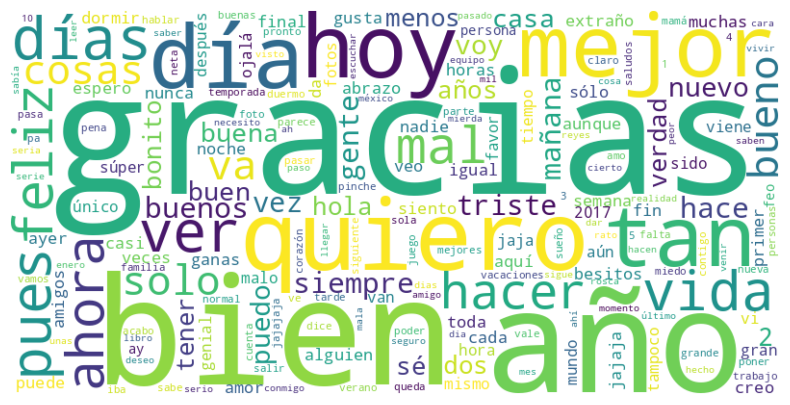

In [83]:
def generar_nube_palabras(df):
    text = ' '.join(df['Contents'].astype(str).apply(limpiar_texto).explode())
    nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(non_biased_word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generar_nube_palabras(tweets)

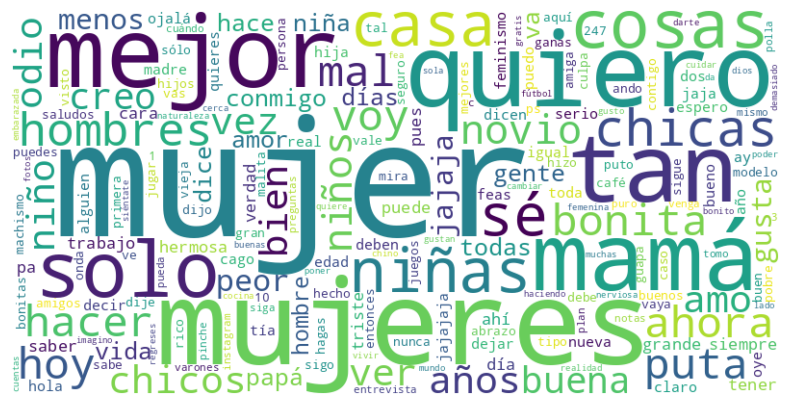

In [84]:
def generar_nube_palabra(df):
    text = ' '.join(df['Contents'].astype(str).apply(limpiar_texto).explode())
    nube = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(biased_word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generar_nube_palabra(tweets)

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?